In [1]:
# This notebook explores the results for the agent based model

In [2]:
import re
import glob
import json
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option( 'display.max_columns', None )
pd.set_option( 'display.max_rows', None )

# Loading localidades GeoJSON for reference

In [ ]:
localidades = gpd.read_file( './data/geo/bogotá/localidades_no_sumapaz.json' )

In [ ]:
del localidades[ 'geometry' ]

In [ ]:
localidades.head()

In [ ]:
locs = {}
for i, row in localidades.iterrows():
    locs[ str( row[ 'codigo_localidad' ] ) ] = row[ 'localidad' ]
locs

# Loading ABM results

In [4]:
city = 'cartagena'
init_date = pd.to_datetime( '03/06/2020' )

In [5]:
path = './data/agents/{}/*.csv'.format( city )

In [6]:
files = glob.glob( path )

In [7]:
agents = []
exp = 0

for file in files:
    df = pd.read_csv( file )
    df[ 'Fecha' ] = df[ 'Día' ].apply( lambda x: init_date + pd.DateOffset( days = x ) )
    df[ 'exp' ] = exp
    agents.append( df )
    exp = exp + 1

agents = pd.concat( agents )
del agents[ 'Unnamed: 0' ]

In [8]:
agents.shape

(25600, 41)

In [9]:
agents.dtypes

Susceptibles                                   int64
Total infectados                               int64
Graves                                         int64
Críticos                                       int64
Leves                                          int64
Recuperados                                    int64
Rt                                           float64
Recuento_zonas                                object
0-9                                           object
10-19                                         object
20-39                                         object
40-59                                         object
>60                                           object
En_cuarentena                                 object
Restringido_movilidad                         object
Vivos                                          int64
Día                                            int64
Contactos_prom_trabajo                       float64
Contactos_prom_transporte                    f

In [10]:
agents.tail()

,Susceptibles,Total infectados,Graves,Críticos,Leves,Recuperados,Rt,Recuento_zonas,0-9,10-19,20-39,40-59,>60,En_cuarentena,Restringido_movilidad,Vivos,Día,Contactos_prom_trabajo,Contactos_prom_transporte,Contactos_prom_casa,Contactos_prom_trabajo_conm,Contactos_prom_transporte_conm,Contactos_prom_casa_conm,Nuevos_infectados,Detectados,En_testing,En_cama,En_UCI,Detectados_por_intervencion,#Intervenidos,porcentaje_edad_activa_por_zona,porcentaje_edad_activa,tasa_letalidad_por_zona,tasa_letalidad,total_muertos,total_muertos_por_zona,total_muertos_edad_activa,total_muertos_edad_activa_por_zona,zonas intervenidas,Fecha,exp
195,23691,438,13,1,424,20273,0.326484,"{'Industrial de la bahia': [8756, 0, 0, 143, 1...","[6914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 264, 0...","[6416, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 788, ...","[4101, 0, 0, 220, 18, 0, 4, 0, 4, 0, 0, 0, 101...","[3002, 0, 0, 137, 13, 0, 5, 0, 4, 1, 0, 1, 686...","[3258, 0, 0, 56, 4, 0, 4, 0, 4, 0, 0, 0, 2160,...","[18046, 126, 4, 1, 6782]","[0, 0, 0, 0, 0]",44402,195,2.824445,1.886874,1.144048,6.450188,4.309057,2.612663,35,307,1,67,6,0,0,{'De la virgen y turistica': 0.005187394631046...,0.004684,{'De la virgen y turistica': 0.025210084033613...,0.012862,4,"{'De la virgen y turistica': 3, 'Industrial de...",1,"{'De la virgen y turistica': 1, 'Industrial de...",{},2020-09-17,127
196,23659,441,14,1,426,20302,0.333333,"{'Industrial de la bahia': [8747, 0, 0, 141, 9...","[6914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 264, 0...","[6414, 0, 0, 12, 2, 0, 0, 0, 0, 0, 0, 0, 789, ...","[4090, 0, 0, 215, 12, 0, 4, 0, 4, 0, 0, 0, 102...","[2987, 0, 0, 143, 12, 0, 6, 0, 4, 1, 0, 1, 687...","[3254, 0, 0, 56, 5, 0, 4, 0, 3, 0, 0, 0, 2164,...","[18662, 142, 3, 0, 8172]","[0, 0, 0, 0, 0]",44402,196,2.263885,1.523625,0.977794,5.769443,3.882913,2.491879,31,307,3,67,6,0,0,{'De la virgen y turistica': 0.005187394631046...,0.004684,{'De la virgen y turistica': 0.025210084033613...,0.012862,4,"{'De la virgen y turistica': 3, 'Industrial de...",1,"{'De la virgen y turistica': 1, 'Industrial de...",{},2020-09-18,127
197,23634,448,14,1,433,20320,0.352679,"{'Industrial de la bahia': [8736, 0, 0, 146, 1...","[6914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 264, 0...","[6414, 0, 0, 12, 1, 0, 0, 0, 0, 0, 0, 0, 789, ...","[4077, 0, 0, 217, 11, 0, 4, 0, 4, 0, 0, 0, 102...","[2978, 0, 0, 145, 15, 0, 7, 0, 4, 1, 0, 1, 687...","[3251, 0, 0, 59, 4, 0, 3, 0, 2, 0, 0, 0, 2165,...","[17810, 117, 3, 0, 6211]","[0, 0, 0, 0, 0]",44402,197,3.052813,2.030945,1.226724,6.690242,4.450817,2.688367,31,307,4,67,6,0,0,{'De la virgen y turistica': 0.005187394631046...,0.004684,{'De la virgen y turistica': 0.025210084033613...,0.012862,4,"{'De la virgen y turistica': 3, 'Industrial de...",1,"{'De la virgen y turistica': 1, 'Industrial de...",{},2020-09-19,127
198,23597,452,14,1,437,20353,0.360619,"{'Industrial de la bahia': [8722, 0, 0, 147, 1...","[6914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 264, 0...","[6413, 0, 0, 13, 1, 0, 0, 0, 0, 0, 0, 0, 789, ...","[4060, 0, 0, 220, 16, 0, 4, 0, 4, 0, 0, 0, 102...","[2963, 0, 0, 146, 13, 0, 7, 0, 5, 1, 0, 1, 689...","[3247, 0, 0, 58, 3, 0, 3, 0, 2, 0, 0, 0, 2170,...","[17793, 103, 7, 0, 6296]","[0, 0, 0, 0, 0]",44402,198,3.047903,2.039052,1.212761,6.698659,4.481414,2.665396,33,308,3,67,6,0,0,{'De la virgen y turistica': 0.005187394631046...,0.004707,{'De la virgen y turistica': 0.025210084033613...,0.012821,4,"{'De la virgen y turistica': 3, 'Industrial de...",1,"{'De la virgen y turistica': 1, 'Industrial de...",{},2020-09-20,127
199,23564,442,13,1,428,20396,0.346154,"{'Industrial de la bahia': [8713, 0, 0, 143, 1...","[6914, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 264, 0...","[6412, 0, 0, 13, 1, 0, 0, 0, 0, 0, 0, 0, 790, ...","[4044, 0, 0, 212, 18, 0, 4, 0, 4, 0, 0, 0, 102...","[2952, 0, 0, 146, 11, 0, 6, 0, 4, 1, 0, 1, 690...","[3242, 0, 0, 57, 5, 0, 3, 0, 2, 0, 0, 0, 2176,...","[17912, 117, 4, 0, 6451]","[0, 0, 0, 0, 0]",44402,199,2.928742,1.978132,1.186230,6.528868,4.409730,2.644392,35,308,3,67,6,0,0,{'De la virge

In [11]:
def sum_quarantine( x ):
    x = json.loads( x )
    people_in_q = x[ 0 ] + x[ 1 ] + x[ 2 ] + x[ 3 ] + x[ 4 ]
    return people_in_q

In [12]:
agents_norm = []

for exp in agents[ 'exp' ].unique():
    df = agents.loc[ agents[ 'exp' ] == exp ]
    total_people = df[ 'Vivos' ].values[ 0 ]
    df[ 'Graves' ] = df[ 'Graves' ] / total_people
    df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
    df[ 'Fallecidos' ] = ( total_people - df[ 'Vivos' ] ) / total_people
    df[ 'R0' ] = ( df[ 'Nuevos_infectados' ].cumsum() / total_people )
    df[ 'Cuarentena' ] = df[ 'En_cuarentena' ].apply( lambda x: sum_quarantine( x ) ) / total_people
    agents_norm.append( df[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos', 'R0', 'Rt', 'Cuarentena' ] ] )

agents_norm = pd.concat( agents_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [13]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,127,2020-09-17,0.000293,0.000023,0.00009,0.464937,0.326484,0.562064
196,127,2020-09-18,0.000315,0.000023,0.00009,0.465635,0.333333,0.607553
197,127,2020-09-19,0.000315,0.000023,0.00009,0.466333,0.352679,0.543643
198,127,2020-09-20,0.000315,0.000023,0.00009,0.467077,0.360619,0.544949
199,127,2020-09-21,0.000293,0.000023,0.00009,0.467865,0.346154,0.551367


In [14]:
def ci( x ):
    try:
        return 1.96 * np.std( x ) / np.sqrt( len( x ) )
    except ZeroDivisionError:
        return 0

agents_norm_grouped = agents_norm.groupby( 'Fecha' ).agg( { 'Graves': [ 'mean', ci ], 'Críticos': [ 'mean', ci ], 'Fallecidos': [ 'mean', ci ], 'R0': [ 'mean', ci ], 'Rt': [ 'mean', ci ], 'Cuarentena': [ 'mean' ] } )
agents_norm_grouped.columns = [ '_'.join( col ).strip() for col in agents_norm_grouped.columns.values ]

In [15]:
agents_norm_grouped.tail()

,Graves_mean,Graves_ci,Críticos_mean,Críticos_ci,Fallecidos_mean,Fallecidos_ci,R0_mean,R0_ci,Rt_mean,Rt_ci,Cuarentena_mean
Fecha,,,,,,,,,,,
2020-09-17,0.000288,0.000013,0.000034,0.000004,0.000137,0.000011,0.463194,0.001208,0.304860,0.004369,0.559667
2020-09-18,0.000279,0.000014,0.000034,0.000004,0.000137,0.000011,0.463801,0.001198,0.306026,0.004348,0.605987
2020-09-19,0.000271,0.000013,0.000034,0.000004,0.000138,0.000011,0.464406,0.001191,0.326030,0.004551,0.543642
2020-09-20,0.000268,0.000012,0.000034,0.000004,0.000138,0.000011,0.465158,0.001181,0.334885,0.004527,0.549003
2020-09-21,0.000268,0.000012,0.000033,0.000004,0.000138,0.000011,0.465900,0.001167,0.325609,0.004369,0.550298


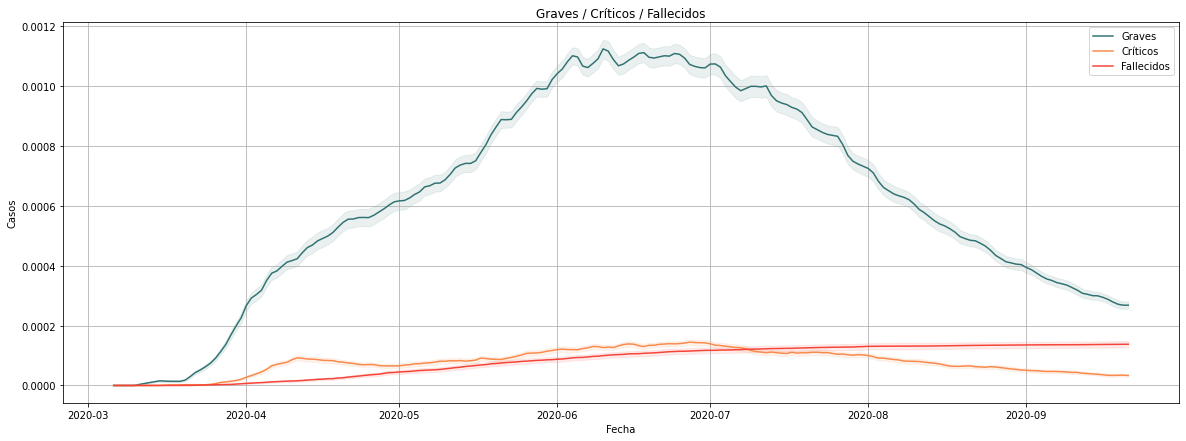

In [16]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Graves_mean' ], label = 'Graves', color = '#317372' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Graves_mean' ] - agents_norm_grouped[ 'Graves_ci' ] ), ( agents_norm_grouped[ 'Graves_mean' ] + agents_norm_grouped[ 'Graves_ci' ] ), color = '#317372', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Críticos_mean' ], label = 'Críticos', color = '#f98a4b' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Críticos_mean' ] - agents_norm_grouped[ 'Críticos_ci' ] ), ( agents_norm_grouped[ 'Críticos_mean' ] + agents_norm_grouped[ 'Críticos_ci' ] ), color = '#f98a4b', alpha = .1 )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Fallecidos_mean' ], label = 'Fallecidos', color = '#f64438' )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Fallecidos_mean' ] - agents_norm_grouped[ 'Fallecidos_ci' ] ), ( agents_norm_grouped[ 'Fallecidos_mean' ] + agents_norm_grouped[ 'Fallecidos_ci' ] ), color = '#f64438', alpha = .1 )

plt.title( 'Graves / Críticos / Fallecidos' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Casos' )
plt.grid( True )
plt.legend()

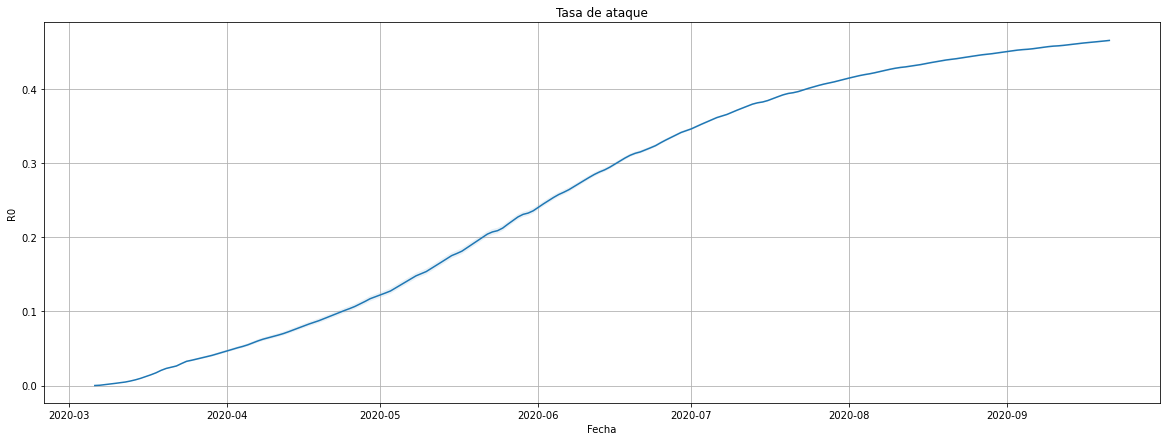

In [17]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'R0_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'R0_mean' ] - agents_norm_grouped[ 'R0_ci' ] ), ( agents_norm_grouped[ 'R0_mean' ] + agents_norm_grouped[ 'R0_ci' ] ), alpha = .1 )

plt.title( 'Tasa de ataque' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'R0' )
plt.grid( True )

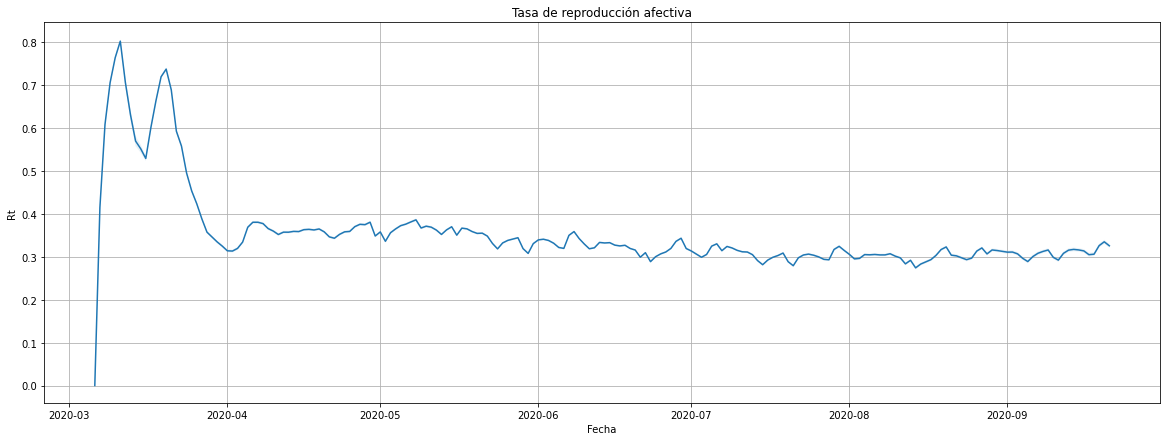

In [18]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Rt_mean' ] )
ax.fill_between( agents_norm_grouped.index, ( agents_norm_grouped[ 'Rt_mean' ] - agents_norm_grouped[ 'Rt_ci' ] ), ( agents_norm_grouped[ 'Rt_mean' ] + agents_norm_grouped[ 'Rt_ci' ] ), alpha = .1 )

plt.title( 'Tasa de reproducción afectiva' )
plt.xlabel( 'Fecha' )
plt.ylabel( 'Rt' )
plt.grid( True )

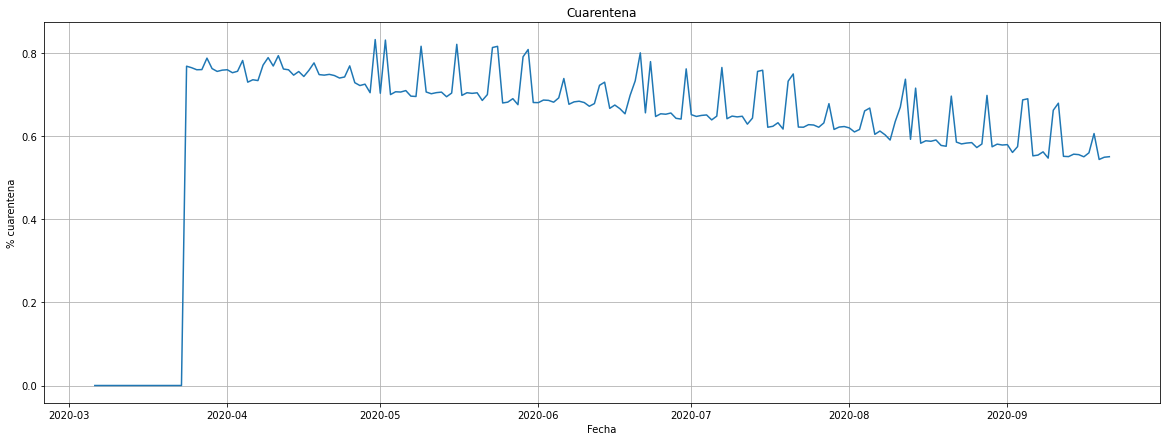

In [19]:
fig, ax = plt.subplots( figsize = ( 20, 7 ) )

ax.plot( agents_norm_grouped.index, agents_norm_grouped[ 'Cuarentena_mean' ] )

plt.title( 'Cuarentena' )
plt.xlabel( 'Fecha' )
plt.ylabel( '% cuarentena' )
plt.grid( True )

In [20]:
agents_norm.tail()

,exp,Fecha,Graves,Críticos,Fallecidos,R0,Rt,Cuarentena
195,127,2020-09-17,0.000293,0.000023,0.00009,0.464937,0.326484,0.562064
196,127,2020-09-18,0.000315,0.000023,0.00009,0.465635,0.333333,0.607553
197,127,2020-09-19,0.000315,0.000023,0.00009,0.466333,0.352679,0.543643
198,127,2020-09-20,0.000315,0.000023,0.00009,0.467077,0.360619,0.544949
199,127,2020-09-21,0.000293,0.000023,0.00009,0.467865,0.346154,0.551367


In [21]:
agents_norm[ [ 'exp', 'Fecha', 'R0', 'Rt', 'Cuarentena' ] ].to_csv( './agents-viz/data/{}-agents-multi.csv'.format( city ), index = False )

In [22]:
pd.melt( agents_norm[ [ 'exp', 'Fecha', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-multi.csv'.format( city ), index = False )

# By localidades

In [23]:
recuento_zonas = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [24]:
def expand_by_loc( x ):
    
    replacer = re.compile("(\d+)")
    x[ 'Recuento_zonas' ] = replacer.sub( r'"\1"', x[ 'Recuento_zonas' ] )
    if city in [ 'cartagena', 'barranquilla' ]:
        x[ 'Recuento_zonas' ] = x[ 'Recuento_zonas' ].replace( "'", '"' )
    #print( x[ 'Recuento_zonas' ] )
    
    x[ 'Recuento_zonas' ] = json.loads( x[ 'Recuento_zonas' ] )
    ds = []
    for z in x[ 'Recuento_zonas' ].keys():
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        if city == 'bogota':
            d[ 'Localidad' ] = locs[ z ]
        else:
            d[ 'Localidad' ] = z
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in recuento_zonas.keys():
            d[ recuento_zonas[ i ] ] = int( x[ 'Recuento_zonas' ][ z ][ i ] )
        ds.append( d )
    
    return ds

agents_locs = []
for i, row in agents.iterrows():
    agents_locs = agents_locs + expand_by_loc( row )

agents_locs = pd.DataFrame( agents_locs )

In [25]:
agents_locs_norm = []

for exp in agents_locs[ 'exp' ].unique():
    for loc in agents_locs[ 'Localidad' ].unique():
        df = agents_locs.loc[ ( agents_locs[ 'exp' ] == exp ) & ( agents_locs[ 'Localidad' ] == loc ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        df[ 'R0' ] = ( df[ '?_4' ].cumsum() / total_people )
        agents_locs_norm.append( df[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos', 'R0' ] ] )

agents_locs_norm = pd.concat( agents_locs_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [26]:
agents_locs_norm[ 'Localidad' ] = agents_locs_norm[ 'Localidad' ].str.replace( '_', ' ' )

In [27]:
agents_locs_norm.tail()

,exp,Fecha,Localidad,Graves,Críticos,Fallecidos,R0
76785,127,2020-09-17,Industrial de la bahia,0.000243,0.000061,0.000061,0.467317
76788,127,2020-09-18,Industrial de la bahia,0.000182,0.000061,0.000061,0.467863
76791,127,2020-09-19,Industrial de la bahia,0.000243,0.000061,0.000061,0.468530
76794,127,2020-09-20,Industrial de la bahia,0.000243,0.000061,0.000061,0.469318
76797,127,2020-09-21,Industrial de la bahia,0.000243,0.000061,0.000061,0.469925


In [28]:
agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'R0' ] ].to_csv( './agents-viz/data/{}-agents-locs-multi.csv'.format( city ), index = False )

In [29]:
pd.melt( agents_locs_norm[ [ 'exp', 'Fecha', 'Localidad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Localidad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-locs-multi.csv'.format( city ), index = False )


# By age groups

In [30]:
grupo_edad = { 0: 'Susceptibles', 1: '?_1', 2: '?_2', 3: 'Leves', 4: '?_4', 5: '?_5', 6: 'Graves', 7: '?_7', 8: '?_8', 9: 'Críticos', 10: '?_10', 11: '?_11', 12: 'Recuperados', 13: '?_13', 14: '?_14'  }

In [31]:
age_ranges = {
    'barranquilla': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'bogota': [ '0-9', '10-19', '20-39', '40-59', '>60' ],
    'cartagena': [ '0-9', '10-19', '20-39', '40-59', '>60' ]
}

In [32]:
def expand_by_age( x ):
    ds = []
    for a in age_ranges[ city ]:
        x[ a ] = json.loads( x[ a ] )
        d = dict()
        d[ 'exp' ] = row[ 'exp' ]
        d[ 'Grupo de edad' ] = a
        d[ 'Día' ] = row[ 'Día' ]
        d[ 'Fecha' ] = init_date + pd.DateOffset( days = d[ 'Día' ] )
        for i in range( 15 ):
            d[ grupo_edad[ i ] ] = x[ a ][ i ]
        ds.append( d )
    return ds

agents_ages = []
for i, row in agents.iterrows():
    agents_ages = agents_ages + expand_by_age( row )

agents_ages = pd.DataFrame( agents_ages )

In [33]:
agents_ages_norm = []

for exp in agents_ages[ 'exp' ].unique():
    for age in agents_ages[ 'Grupo de edad' ].unique():
        df = agents_ages.loc[ ( agents_ages[ 'exp' ] == exp ) & ( agents_ages[ 'Grupo de edad' ] == age ) ]
        total_people = ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ).values[ 0 ]

        df[ 'Fallecidos' ] = ( total_people - ( df[ 'Susceptibles' ] + df[ 'Leves' ] + df[ 'Graves' ] + df[ 'Críticos' ] + df[ 'Recuperados' ] ) ) / total_people
        df[ 'Graves' ] = df[ 'Graves' ] / total_people
        df[ 'Críticos' ] = df[ 'Críticos' ] / total_people
        agents_ages_norm.append( df[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ] )

agents_ages_norm = pd.concat( agents_ages_norm )

/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/fabian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [34]:
agents_ages_norm.tail()

,exp,Fecha,Grupo de edad,Graves,Críticos,Fallecidos
127979,127,2020-09-17,>60,0.000730,0.0,0.000547
127984,127,2020-09-18,>60,0.000730,0.0,0.000547
127989,127,2020-09-19,>60,0.000547,0.0,0.000547
127994,127,2020-09-20,>60,0.000547,0.0,0.000547
127999,127,2020-09-21,>60,0.000547,0.0,0.000547


In [35]:
pd.melt( agents_ages_norm[ [ 'exp', 'Fecha', 'Grupo de edad', 'Graves', 'Críticos', 'Fallecidos' ] ], id_vars = [ 'Fecha', 'Grupo de edad' ], value_vars =[ 'Graves', 'Críticos', 'Fallecidos' ] ).to_csv( './agents-viz/data/{}-agents2-ages-multi.csv'.format( city ), index = False )
